## Importing Necessary Libraries and Loading the Data

In [14]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from textblob import Word
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc

In [2]:
train = pd.read_csv(r'/media/alvee/New Volume/GIT/Data-Analysis-ML/IMDB Sentiment Analysis/datasets/Kaggle/Train.csv')
valid = pd.read_csv(r'/media/alvee/New Volume/GIT/Data-Analysis-ML/IMDB Sentiment Analysis/datasets/Kaggle/Valid.csv')
test = pd.read_csv(r'/media/alvee/New Volume/GIT/Data-Analysis-ML/IMDB Sentiment Analysis/datasets/Kaggle/Test.csv')

In [3]:
print(train.info())
print(valid.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
None


In [4]:
train.head(10)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [5]:
print("Train Data:::\n" ,train.label.value_counts())
print("Validation Data:::\n" ,valid.label.value_counts())
print("Test Data:::\n" ,test.label.value_counts())

Train Data:::
 0    20019
1    19981
Name: label, dtype: int64
Validation Data:::
 1    2514
0    2486
Name: label, dtype: int64
Test Data:::
 1    2505
0    2495
Name: label, dtype: int64


In [6]:
train.groupby("label").count()

,text
label,
0,20019
1,19981


## Data Preprocessing

In [7]:
# import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/alvee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
def transformations(dataframe):
    
    # make all character lower
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # removing punctuations
    dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
    
#     #numbers
#     dataframe['text'] = dataframe['text'].str.replace('\d','')

    # removing stopwords
    sw = stopwords.words('english')
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    
    # rare characters deleting
    sil = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-1000:]
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))
    
    # lemmatization
    
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
    
    return dataframe

In [9]:
train = transformations(train)
train.head()

/tmp/ipykernel_17685/3721019195.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')


,text,label
0,grew b 1965 watching loving thunderbird mate s...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change g...,1


In [10]:
valid = transformations(valid)
valid.head()

/tmp/ipykernel_17685/3721019195.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')


,text,label
0,14 year since sharon stone awarded viewer legc...,0
1,someone needed make car payment truly awful ma...,0
2,guideline state comment must contain minimum f...,0
3,movie muddled mishmash clichés recent cinema p...,0
4,stan laurel became smaller half alltime greate...,0


In [11]:
test = transformations(test)
test.head()

/tmp/ipykernel_17685/3721019195.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')


,text,label
0,always wrote series complete stinkfest jim bel...,0
1,1st watched 1272002 3 10dirsteve purcell typic...,0
2,movie poorly written directed fell asleep 30 m...,0
3,interesting thing miryang secret sunshine acto...,1
4,first read berlin meer didnt expect much thoug...,0


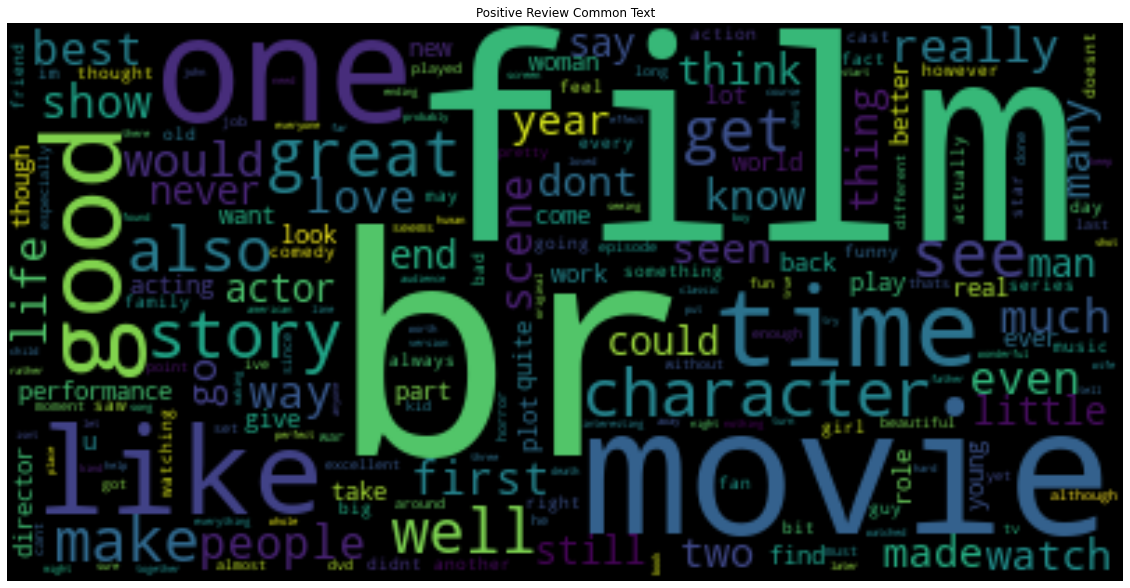

In [19]:
plt.figure(figsize=(20,20))
pos_freq = FreqDist(' '.join(train[train['label'] == 1].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=pos_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()


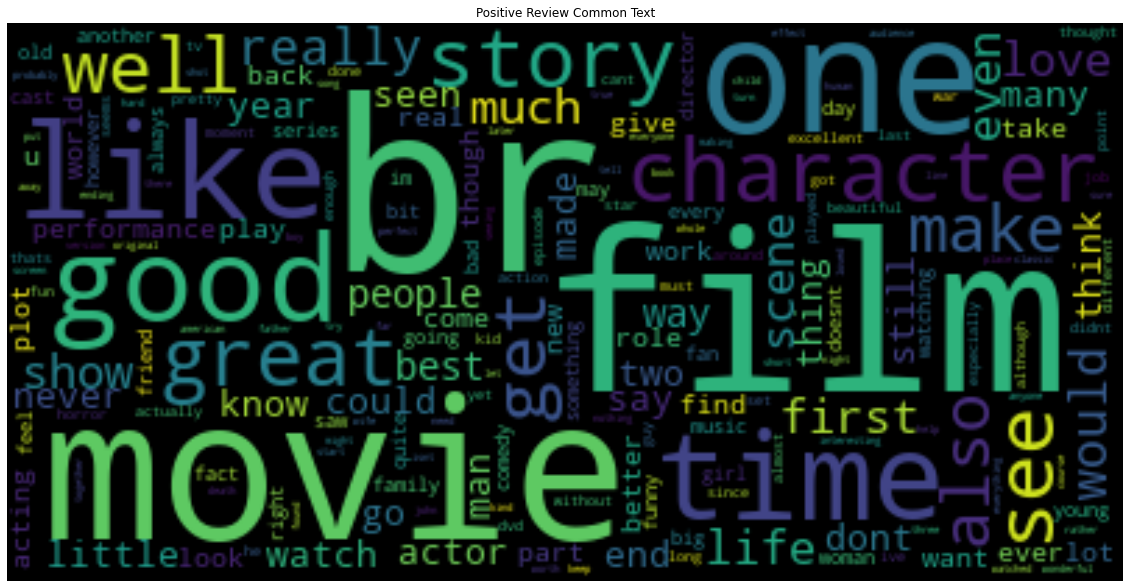

In [20]:
plt.figure(figsize=(20,20))
neg_freq = FreqDist(' '.join(train[train['label'] == 0].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=pos_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()